In [3]:
import pandas as pd
import numpy as np

In [8]:
df = pd.read_csv("abc_employees.csv")
df.head()

,Name,Team,Number,Position,Age,Height,Weight,College,Salary
0,Avery Bradley,Boston Celtics,0,PG,25,06-Feb,180,Texas,7730337.0
1,Jae Crowder,Boston Celtics,99,SF,25,06-Jun,235,Marquette,6796117.0
2,John Holland,Boston Celtics,30,SG,27,06-May,205,Boston University,NaN
3,R.J. Hunter,Boston Celtics,28,SG,22,06-May,185,Georgia State,1148640.0
4,Jonas Jerebko,Boston Celtics,8,PF,29,06-Oct,231,NaN,5000000.0


In [40]:
#Correct the data in the "height" column by replacing it with random numbers between 150 and 180
df['Height']=np.random.randint(150,180,size=len(df))
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      458 non-null    object 
 1   Team      458 non-null    object 
 2   Number    458 non-null    int64  
 3   Position  458 non-null    object 
 4   Age       458 non-null    int64  
 5   Height    458 non-null    int32  
 6   Weight    458 non-null    int64  
 7   College   374 non-null    object 
 8   Salary    447 non-null    float64
dtypes: float64(1), int32(1), int64(3), object(4)
memory usage: 30.5+ KB


In [5]:
# Determine the distribution of employees across each team and calculate the percentage split relative to the total number of employees
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
teamcounts=df['Team'].value_counts()
distribution1=(teamcounts/len(df))*100

Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

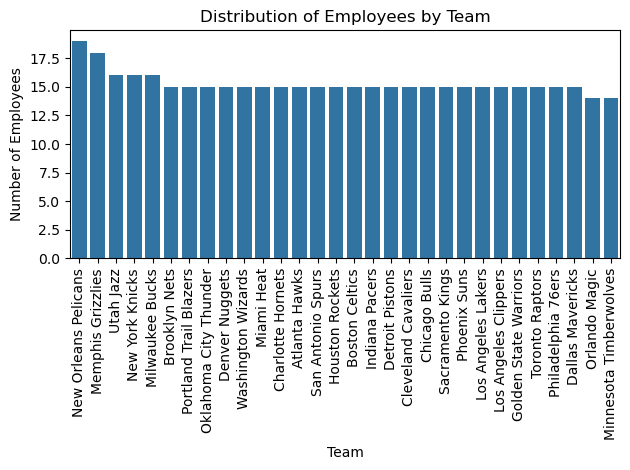

In [108]:

sns.barplot(x=teamcounts.index,y=teamcounts.values)
plt.title("Distribution of Employees by Team")
plt.ylabel("Number of Employees")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()


In [114]:
print(distribution1)


Team
New Orleans Pelicans      4.148472
Memphis Grizzlies         3.930131
Utah Jazz                 3.493450
New York Knicks           3.493450
Milwaukee Bucks           3.493450
Brooklyn Nets             3.275109
Portland Trail Blazers    3.275109
Oklahoma City Thunder     3.275109
Denver Nuggets            3.275109
Washington Wizards        3.275109
Miami Heat                3.275109
Charlotte Hornets         3.275109
Atlanta Hawks             3.275109
San Antonio Spurs         3.275109
Houston Rockets           3.275109
Boston Celtics            3.275109
Indiana Pacers            3.275109
Detroit Pistons           3.275109
Cleveland Cavaliers       3.275109
Chicago Bulls             3.275109
Sacramento Kings          3.275109
Phoenix Suns              3.275109
Los Angeles Lakers        3.275109
Los Angeles Clippers      3.275109
Golden State Warriors     3.275109
Toronto Raptors           3.275109
Philadelphia 76ers        3.275109
Dallas Mavericks          3.275109
Orlando Magic  

Text(0.5, 1.0, 'Employee Count by Position')

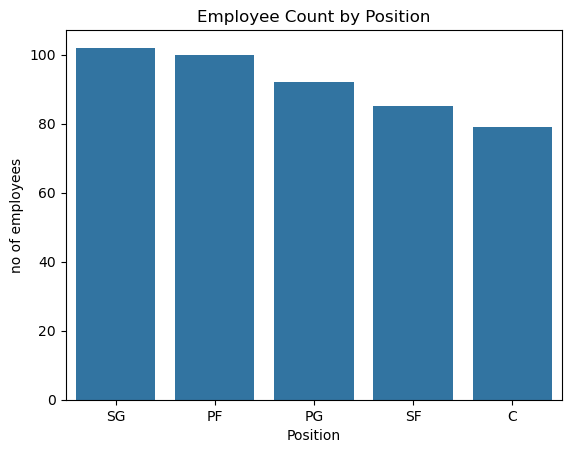

In [134]:
# Segregate employees based on their positions within the company
positioncount=df['Position'].value_counts()
sns.barplot(x=positioncount.index,y=positioncount.values)
plt.ylabel("no of employees")
plt.title("Employee Count by Position")



In [62]:
#Identify the predominant age group among employees.


In [52]:
x=[15,20,25,30,35,40,45]
y=['15-20','21-25','26-30','31-35','36-40','41-45']
df['age_group'] = pd.cut(df['Age'], bins=x, labels=y, right=False)
df['age_group']

0      26-30
1      26-30
2      26-30
3      21-25
4      26-30
       ...  
453    26-30
454    21-25
455    26-30
456    26-30
457    26-30
Name: age_group, Length: 458, dtype: category
Categories (6, object): ['15-20' < '21-25' < '26-30' < '31-35' < '36-40' < '41-45']

In [60]:
agegroupcount=df['age_group'].value_counts().sort_index()
agegroupcount

age_group
15-20      2
21-25    152
26-30    182
31-35     90
36-40     29
41-45      3
Name: count, dtype: int64

Text(0, 0.5, 'count')

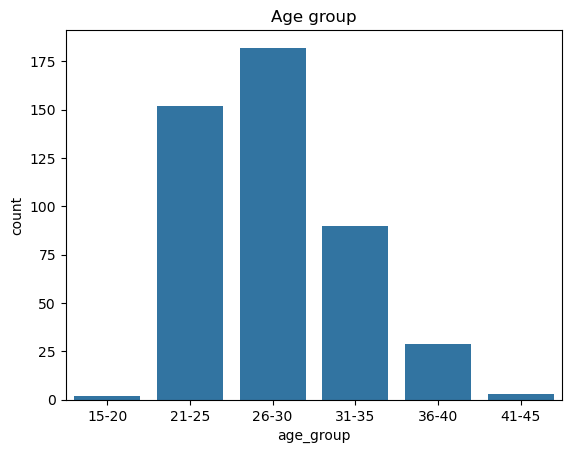

In [74]:
sns.barplot(x=agegroupcount.index,y=agegroupcount.values)
plt.title("Age group")
plt.ylabel("count")

Team with highest salary expenditure: Cleveland Cavaliers


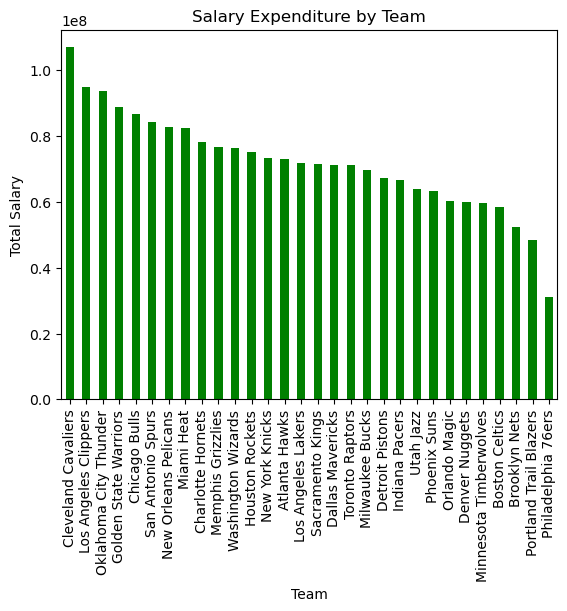

In [94]:
# Discover which team and position have the highest salary expenditure
teamsalary = df.groupby('Team')['Salary'].sum().sort_values(ascending=False)
positionsalary = df.groupby('Position')['Salary'].sum().sort_values(ascending=False)

teamsalary.plot(kind='bar', color='green')
plt.title("Salary Expenditure by Team")
plt.ylabel("Total Salary")
print("Team with highest salary expenditure:", teamsalary.idxmax())


Position with highest salary expenditure: C


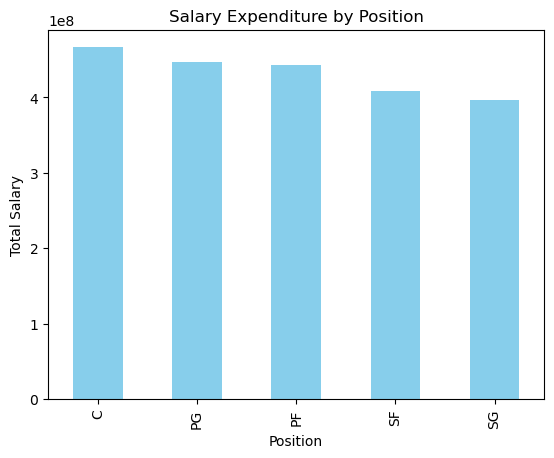

In [100]:
positionsalary.plot(kind='bar', color='skyblue')
plt.title("Salary Expenditure by Position")
plt.ylabel("Total Salary")
print("Position with highest salary expenditure:", positionsalary.idxmax())


In [88]:
# Investigate if there's any correlation between age and salary, and represent it visually

Correlation coefficient between age and salary: 0.21


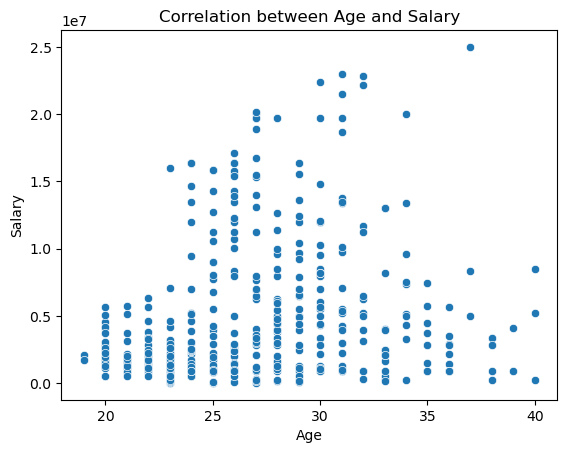

In [122]:
sns.scatterplot( x='Age', y='Salary',data=df)
plt.title("Correlation between Age and Salary")
correlation = df['Age'].corr(df['Salary'])
print("Correlation coefficient between age and salary:", round(correlation, 2))
